In [66]:
from bokeh.sampledata.population import data
import numpy as np

def filter_loc(country):
    df = data[data.Location == country]

    df['percent'] = np.nan
    for i in df.index:
        year = df.at[i, 'Year']
        total_pop = df[df.Year == year].Value.sum()
        df.at[i, 'percent'] = df.at[i, 'Value'] / total_pop * 100
        
    return df

data = filter_loc('United States of America')

/Users/katyhagerty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as fx

# Sets plot style
sns.set()

# Function to create plots
def make_plot(year):
    
    # Filter data
    df = data[data.Year == year]
        
    # Make plot
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
    ax1.invert_xaxis()
    fig.subplots_adjust(wspace = 0) 
    
    ax1.barh(df[df.Sex == 'Male'].AgeGrp, df[df.Sex == 'Male'].percent, label = 'Male')
    ax2.barh(df[df.Sex == 'Female'].AgeGrp, df[df.Sex == 'Female'].percent, label = 'Female', color = 'C1')
    
    # Set limits so all plots have the same scales
    ax1.set_xlim([11, 0])
    ax2.set_xlim([0, 11])
    ax1.set_ylim([-1, 20])
    
    country = df.Location.iloc[0]
    if country == 'United States of America': country == 'US'
        
    fig.suptitle(f'{country} Population Distribution')
    fig.supxlabel('Percentage of Population (%)')
    fig.legend(bbox_to_anchor = (0.9, 0.88), loc = 'upper right')
    ax1.set_ylabel('Age Groups')
    
    # Add text to plot
    text = ax1.text(3.8, 18, str(year), fontsize = 24, 
                    va = 'center', ha = 'left')
    text.set_path_effects([
        fx.Stroke(linewidth= 5, foreground = '1.0'),
        fx.Normal()])
    
    return fig

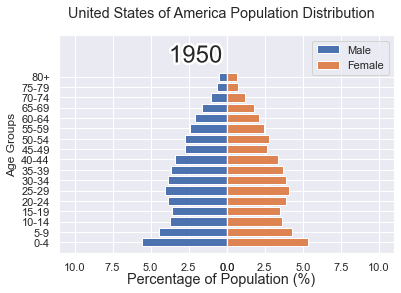

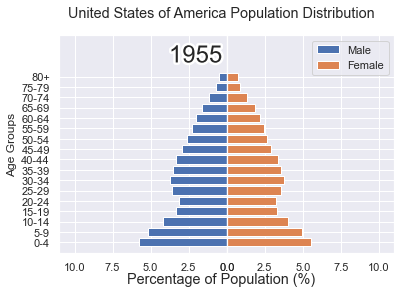

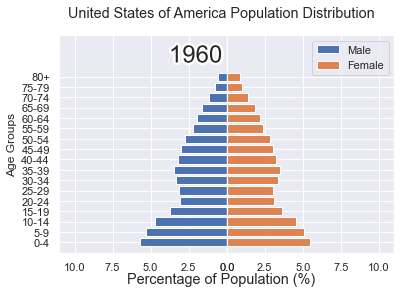

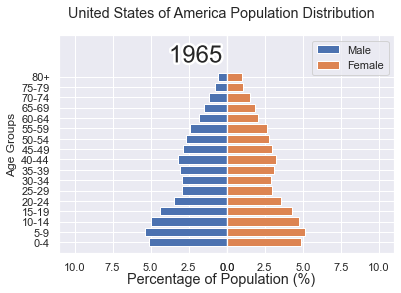

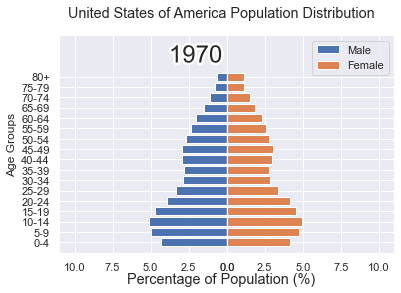

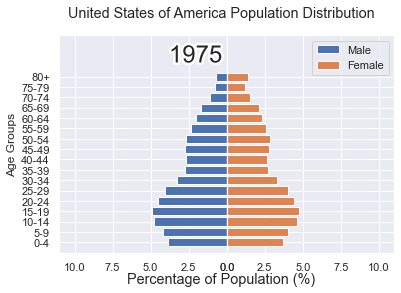

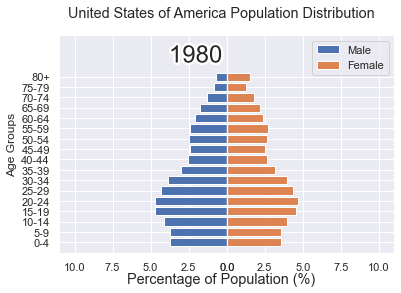

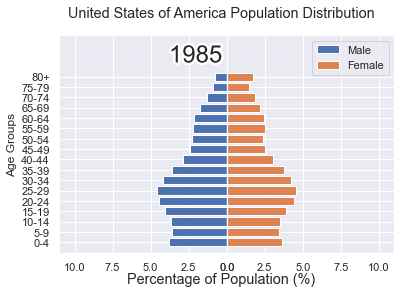

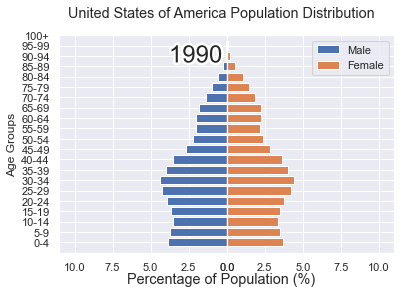

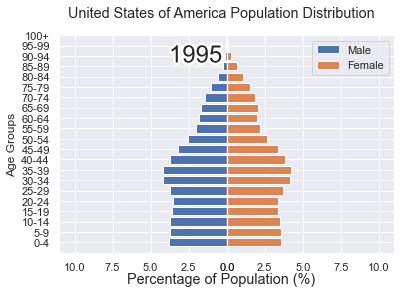

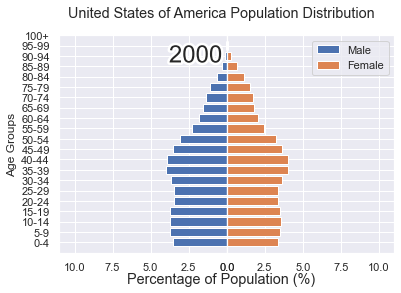

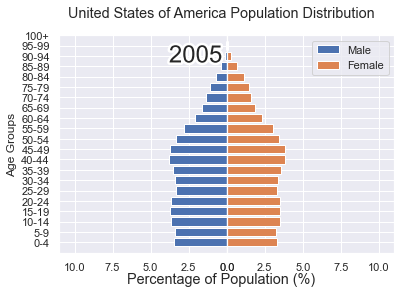

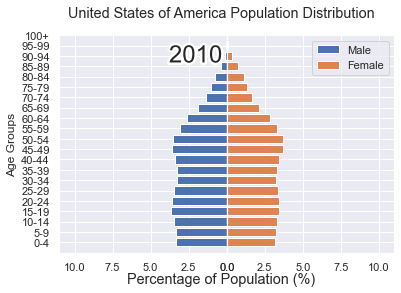

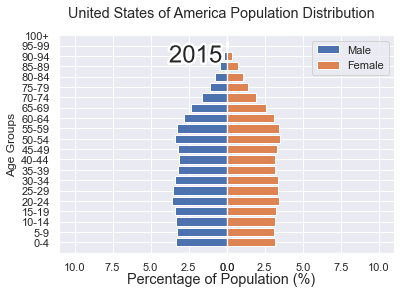

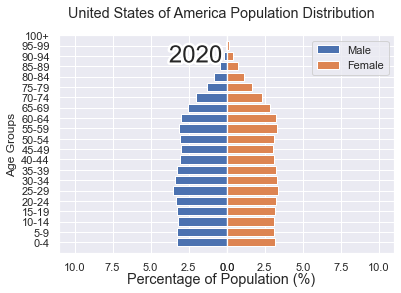

In [69]:
years = [i for i in set(data.Year) if i < 2022]
years.sort()

for year in years:
    fig = make_plot(year)
    fig.savefig(f'{year}.jpeg',bbox_inches = 'tight')

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

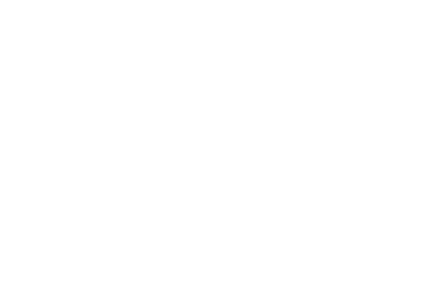

In [68]:
import matplotlib.animation as animation

# Create new figure for GIF
fig, ax = plt.subplots()

# Adjust figure so GIF does not have extra whitespace
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.axis('off')
ims = []

for year in years:
    im = ax.imshow(plt.imread(f'{year}.jpeg'), animated = True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=600)
ani.save('us_population.gif')

/Users/katyhagerty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
MovieWriter ffmpeg unavailable; using Pillow instead.
/Users/katyhagerty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


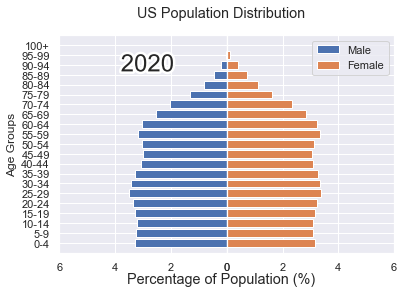

In [22]:
#Without saving frames

years = [i for i in set(data.Year) if i < 2022]
years.sort()

# Initialize plot
# Will be overwritten by run function
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
   
df = data[data.Year == 1955]

y_pos = [i for i in range(len(df[df.Sex == 'Male']))]
male = ax1.barh(y_pos, df[df.Sex == 'Male'].percent, label = 'Male',
               tick_label = df[df.Sex == 'Male'].AgeGrp)
female = ax2.barh(y_pos, df[df.Sex == 'Female'].percent, label = 'Female', 
                  color = 'C1', tick_label = df[df.Sex == 'Male'].AgeGrp)

ax1.invert_xaxis()

# Set limits so all plots have the same scales
ax1.set_xlim([6, 0])
ax2.set_xlim([0, 6])
ax1.set_ylim([-1, 21])

fig.suptitle('US Population Distribution')
fig.supxlabel('Percentage of Population (%)')
fig.legend(bbox_to_anchor = (0.9, 0.88), loc = 'upper right')
ax1.set_ylabel('Age Groups')

fig.subplots_adjust(wspace = 0)

# Add text to plot
text = ax1.text(3.8, 18, '', fontsize = 24, 
                va = 'center', ha = 'left')
text.set_path_effects([
    fx.Stroke(linewidth= 5, foreground = '1.0'),
    fx.Normal()])
    
def run(year):

    # Filter data
    df = data[data.Year == year]

    # Find percentage of population for each age group
    total_pop = df.Value.sum()
    df['percent'] = df.Value / total_pop * 100

    if len(male.patches) != len(df[df.Sex == 'Male']):
        male.remove()
        y_pos = [i for i in range(len(df[df.Sex == 'Male']))]
        male.patches = ax1.barh(y_pos, df[df.Sex == 'Male'].percent, label = 'Male', 
                         color = 'C0', tick_label = df[df.Sex == 'Male'].AgeGrp)

        female.remove()
        female.patches = ax2.barh(y_pos, df[df.Sex == 'Female'].percent, label = 'Female',
                          color = 'C1', tick_label = df[df.Sex == 'Female'].AgeGrp)

    else:
        for count, rect in zip(df[df.Sex == 'Male'].percent, male.patches):
            rect.set_width(count)

        for count, rect in zip(df[df.Sex == 'Female'].percent, female.patches):
            rect.set_width(count)

    text.set_text(year)

    return male#, female
    
ani = animation.FuncAnimation(fig, run, years, blit = True, repeat = True, 
                              interval = 600)
ani.save('us_population_from_funct.gif')

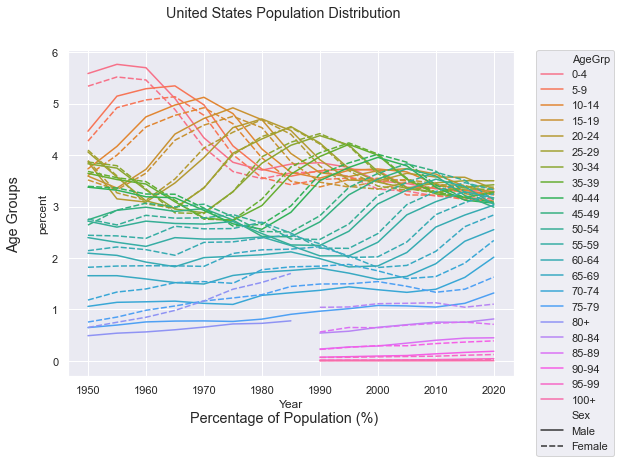

In [75]:
df = data[data.Year <= 2022]

# Static Plot
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Year', y = 'percent', hue = 'AgeGrp', style = 'Sex', data = df, ax = ax)

fig.suptitle(f'United States Population Distribution')
fig.supxlabel('Percentage of Population (%)')
fig.supylabel('Age Groups')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad= 0)

In [24]:
# Find data coordinates of axes
# Used to determine where to place legend on figure
fig.get_axes()[1].get_position()

IndexError: list index out of range

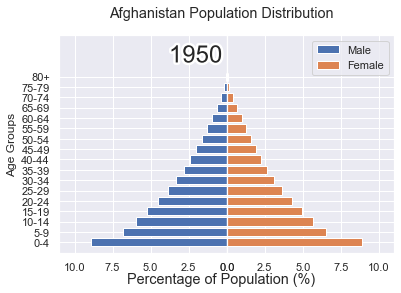

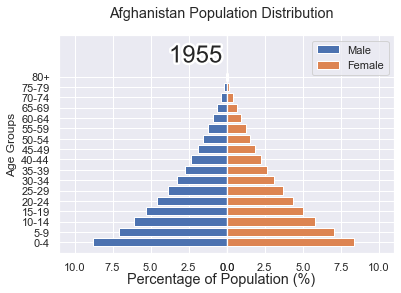

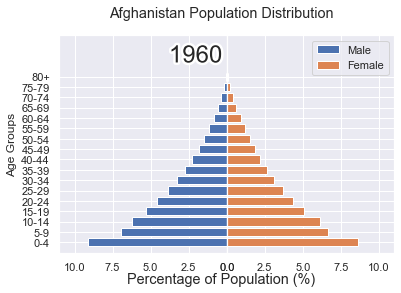

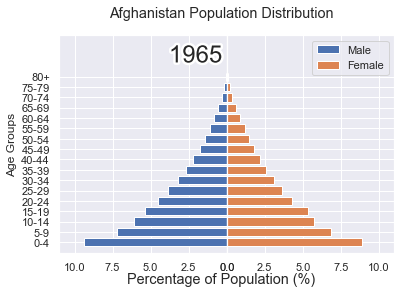

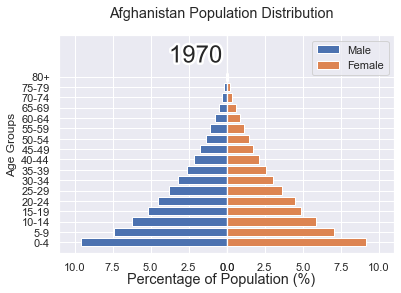

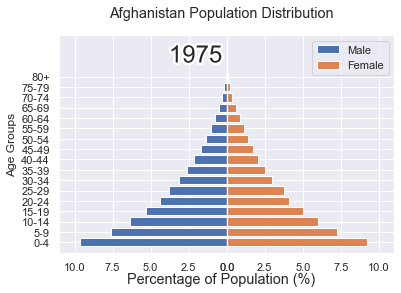

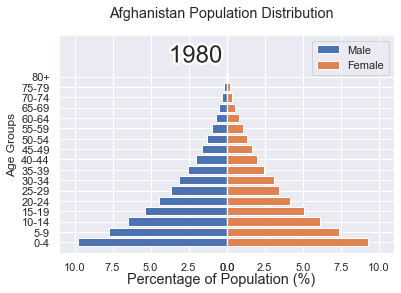

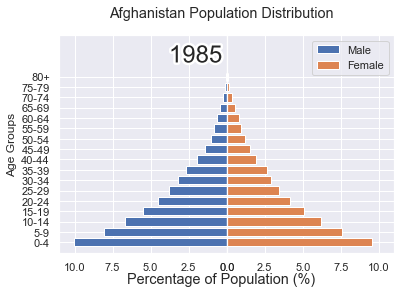

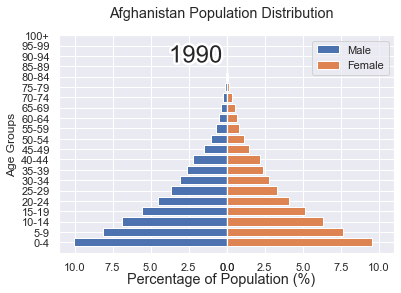

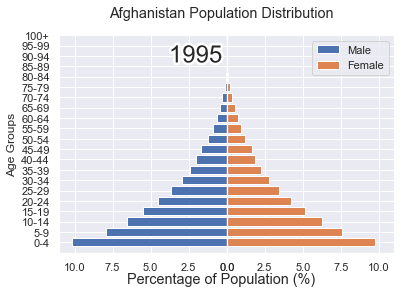

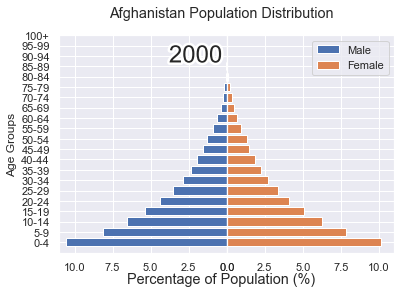

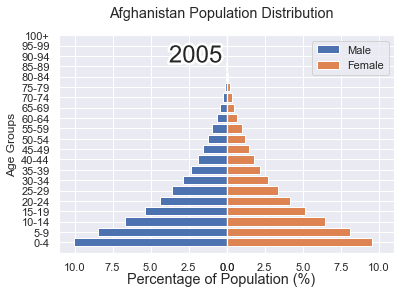

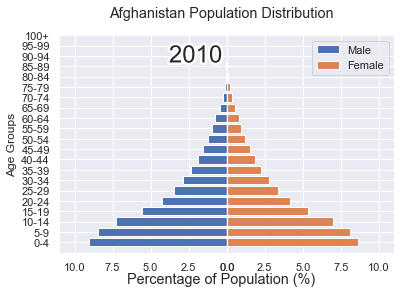

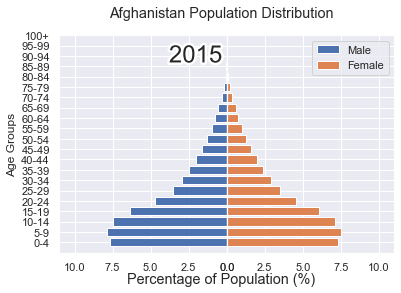

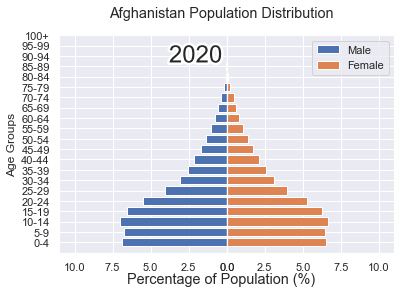

In [45]:
# Afghanistan
from bokeh.sampledata.population import data

data = filter_loc('Afghanistan')

years = [i for i in set(data.Year) if i < 2022]
years.sort()

for year in years:
    fig = make_plot(year)
    fig.savefig(f'Aghanistan_{year}.jpeg',bbox_inches = 'tight')

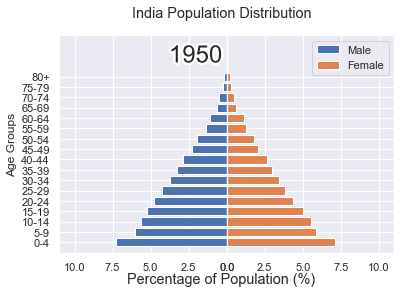

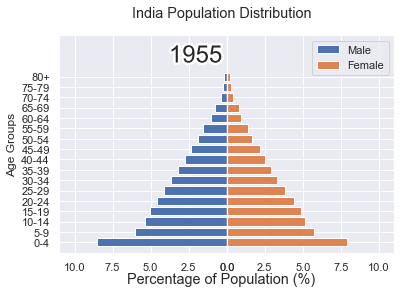

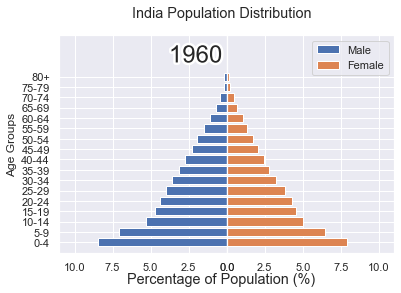

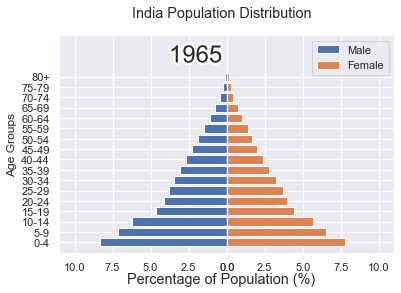

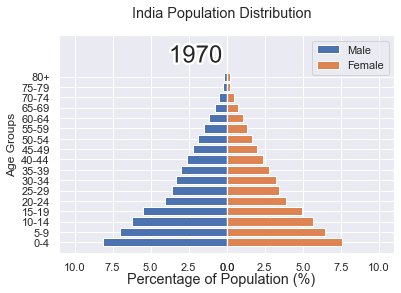

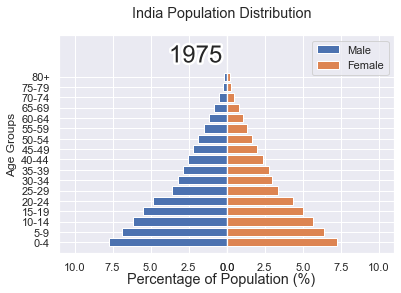

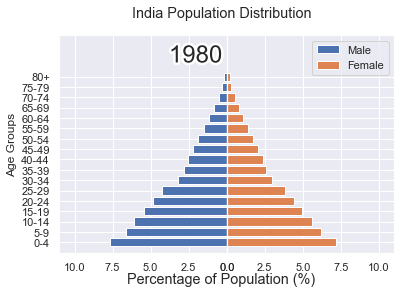

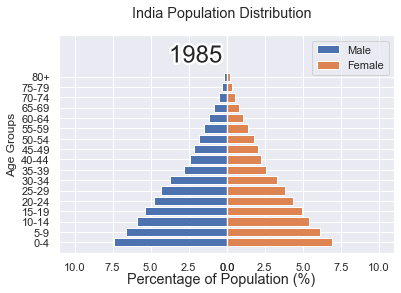

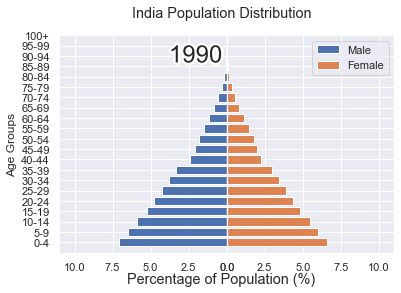

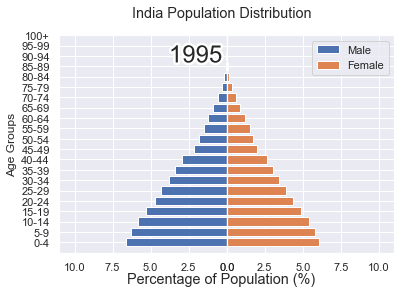

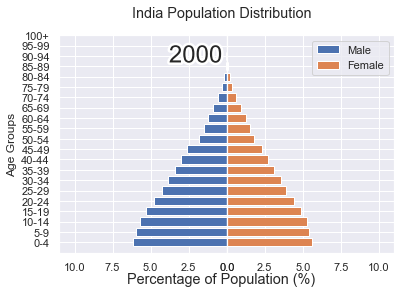

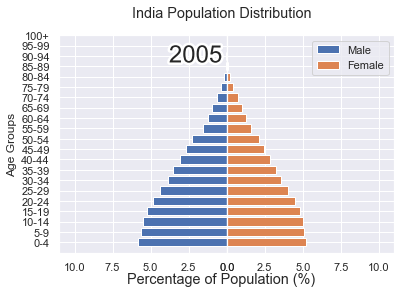

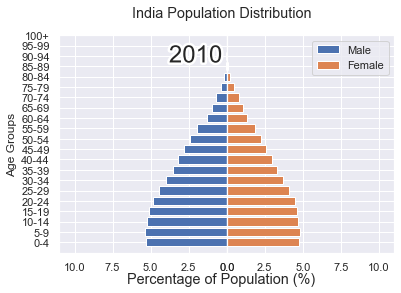

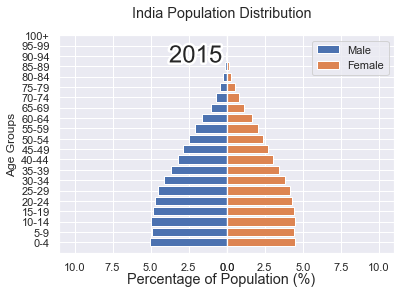

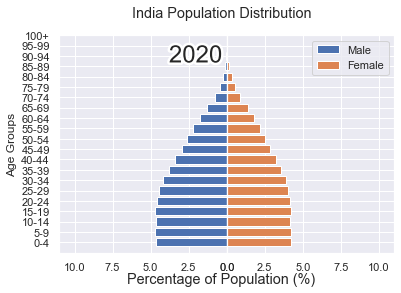

In [46]:
# India
from bokeh.sampledata.population import data

data = filter_loc('India')

years = [i for i in set(data.Year) if i < 2022]
years.sort()

for year in years:
    fig = make_plot(year)
    fig.savefig(f'India_{year}.jpeg',bbox_inches = 'tight')

MovieWriter ffmpeg unavailable; using Pillow instead.


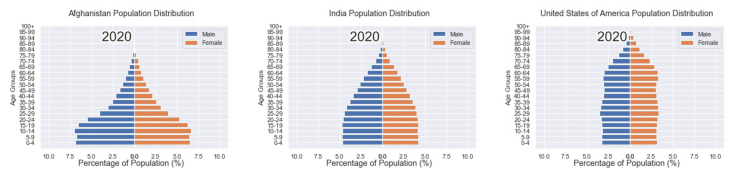

In [72]:
import matplotlib.animation as animation

# Create new figure for GIF
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 3))

# Adjust figure so GIF does not have extra whitespace
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
ax.axis('off')
ax2.axis('off')
ax3.axis('off')
ims = []

for year in years:
    im = ax.imshow(plt.imread(f'Aghanistan_{year}.jpeg'), animated = True)
    im2 = ax2.imshow(plt.imread(f'India_{year}.jpeg'), animated = True)
    im3 = ax3.imshow(plt.imread(f'{year}.jpeg'), animated = True)
    ims.append([im, im2, im3])

ani = animation.ArtistAnimation(fig, ims, interval=600)
ani.save('comparison.gif')